<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/43_data_science_libs/hw06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 6
Определение проблемы переобучения на практике

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о каче

In [118]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data = load_iris(return_X_y=False, as_frame=False)
features = data.data
feature_names = data.feature_names
target = data.target
target_name = data.target_names
df = pd.DataFrame(features, columns=feature_names)
df['target'] = target

In [120]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [121]:
df.shape

(150, 5)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [123]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Проверим данные сбалансированность

In [124]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


Проверим данные на выбросы

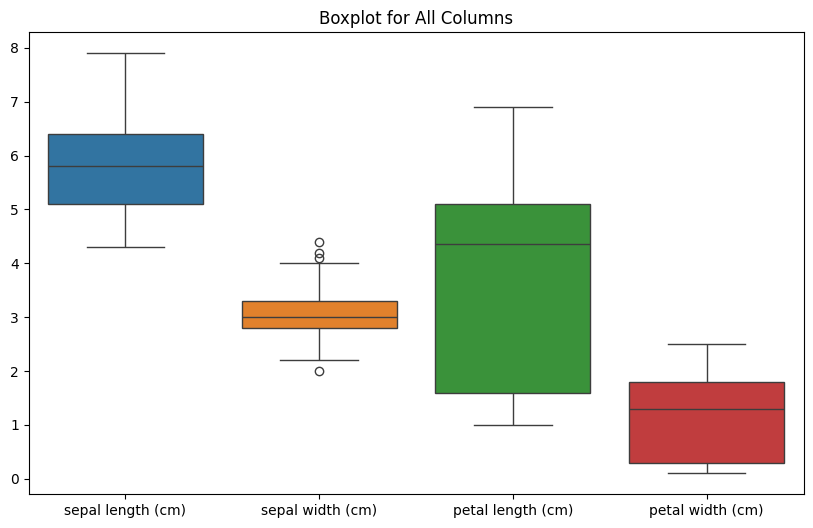

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['target']))
plt.title("Boxplot for All Columns")
plt.show()

Обучим модель логистической регрессии без регуляризации

In [126]:
X = df.drop(columns=['target'])
y = df['target']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [127]:
base_model_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {base_model_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy: 0.9417
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.89      0.95      0.92        41
           2       0.94      0.87      0.91        39

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



Результаты достаточно хороши:<br>
Accuracy 94%<br>
Точность от 89 до 100%<br>
Вполне достойный результат!

Добавим L1 регуляризацию

In [128]:
solvers = ['liblinear', 'saga']
results = []

for solver in solvers:
    model = LogisticRegression(
        penalty='l1',
        solver=solver,
        max_iter=10000,
        random_state=42
      )
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')


    results.append({
        'Solver': solver,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [129]:
pd.DataFrame(results)

,Solver,Accuracy,Precision,Recall,F1 Score
0,liblinear,0.841667,0.893534,0.841667,0.833298
1,saga,0.950000,0.950649,0.950000,0.949937


saga показываетлучший результат

In [130]:
l1_accuracy = results[-1].get('Accuracy')

Добавим L2 регуларизацию, подберем оптимальный solver

In [131]:
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
results = []

for solver in solvers:
    model = LogisticRegression(
        penalty='l2',
        solver=solver,
        max_iter=10000,
        random_state=42
      )
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')


    results.append({
        'Solver': solver,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [132]:
pd.DataFrame(results)

,Solver,Accuracy,Precision,Recall,F1 Score
0,liblinear,0.833333,0.889831,0.833333,0.823458
1,lbfgs,0.941667,0.943119,0.941667,0.941529
2,newton-cg,0.941667,0.943119,0.941667,0.941529
3,sag,0.941667,0.941802,0.941667,0.941639
4,saga,0.958333,0.958490,0.958333,0.958314


Лучшие результаты у saga

In [133]:
l2_accuracy = results[-1].get('Accuracy')

Добавим оба типа регуляризации

In [134]:
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=5000,
    C=1.0
)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

In [135]:
print(
    f"Accuracy: {accuracy:.4f}\n"
    f"Precision: {precision:.4f}\n"
    f"Recall: {recall:.4f}\n"
    f"F1 Score: {f1:.4f}"
)

Accuracy: 0.9500
Precision: 0.9500
Recall: 0.9500
F1 Score: 0.9500


Подберем оптимальные значения параметра регуляризации с помощью кросс-валидации.

In [136]:
model = LogisticRegression(solver='saga', max_iter=5000)

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.5]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

Получены оптимальные параметры модели

In [137]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая метрика:", grid_search.best_score_)
print("Точность на тестовых данных:", accuracy_score(y_test, y_test_pred))

Лучшие параметры: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}
Лучшая метрика: 1.0
Точность на тестовых данных: 0.95


In [138]:
l1_l2_accuracy = accuracy_score(y_test, y_test_pred)

# Анализ результатов

In [139]:
comparision = pd.DataFrame(
    {
        'Регуляризация': ['Base', 'L1', 'L2', 'L1+L2'],
        'Accuracy': [base_model_accuracy, l1_accuracy, l2_accuracy, l1_l2_accuracy]
    }
)
comparision

,Регуляризация,Accuracy
0,Base,0.941667
1,L1,0.950000
2,L2,0.958333
3,L1+L2,0.950000


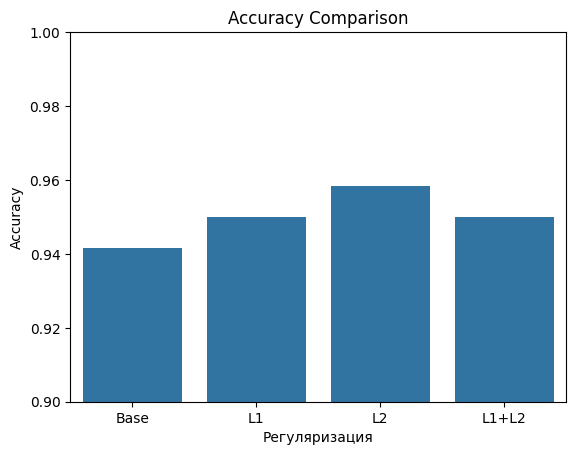

In [140]:
sns.barplot(x='Регуляризация', y='Accuracy', data=comparision)
plt.title('Accuracy Comparison')
plt.ylim(0.9, 1)
plt.show()

Сравнение параметра accuracy показывает улучшение на 1 процентный пункт при применении регуляризации типа L1 или L1+L2 <br>
Наилучшие результаты показывает L2 регуляризация

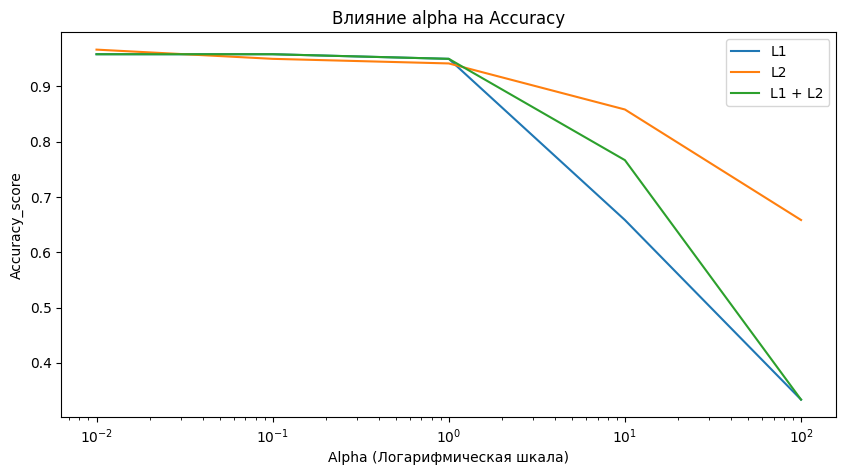

In [141]:
accuracy_score_l1, accuracy_score_l2, accuracy_score_l1_l2 = [], [], []

MAX_ITER = 5000
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

for alpha in alphas:
    logistic_l1 = LogisticRegression(
        penalty='l1',
        solver='saga',
        C=1/alpha,
        max_iter=MAX_ITER
    )
    logistic_l1.fit(X_train, y_train)
    y_pred_l1 = logistic_l1.predict(X_test)
    accuracy_score_l1.append(accuracy_score(y_test, y_pred_l1))

    logistic_l2 = LogisticRegression(
        penalty='l2',
        C=1/alpha,
        max_iter=MAX_ITER
    )
    logistic_l2.fit(X_train, y_train)
    y_pred_l2 = logistic_l2.predict(X_test)
    accuracy_score_l2.append(accuracy_score(y_test, y_pred_l2))

    logistic_l1_l2 = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=0.5,
        max_iter=5000,
        C=1/alpha
    )
    logistic_l1_l2.fit(X_train, y_train)
    y_pred_l1_l2 = logistic_l1_l2.predict(X_test)
    accuracy_score_l1_l2.append(accuracy_score(y_test, y_pred_l1_l2))


plt.figure(figsize=(10, 5))
plt.plot(alphas, accuracy_score_l1, label='L1')
plt.plot(alphas, accuracy_score_l2, label='L2')
plt.plot(alphas, accuracy_score_l1_l2, label='L1 + L2')
plt.xscale('log')
plt.xlabel('Alpha (Логарифмическая шкала)')
plt.ylabel('Accuracy_score')
plt.title('Влияние alpha на Accuracy')
plt.legend()
plt.show()

# Выводы

График демонстрирует зависимость метрики качества модели (Accuracy) от значения гиперпараметра alpha при использовании различных регуляризаторов (L1, L2, L1+L2).


Влияние alpha: Увеличение значения alpha приводит к снижению значения Accuracy для всех типов регуляризации. Это говорит о том, что чрезмерная регуляризация может привести к ухудшению обобщающей способности модели.
Сравнение регуляризаторов:<br>
L1: Регуляризатор L1 демонстрирует более плавное снижение Accuracy с ростом alpha. Это связано с его свойством отбора признаков, которое может быть полезно при работе с высокоразмерными данными.<br>
L2: Регуляризатор L2 также приводит к снижению Accuracy, однако кривая более резкая. Это может указывать на то, что L2 менее устойчив к изменениям значения alpha.<br>
L1+L2: Комбинация регуляризаторов L1 и L2 показывает промежуточное поведение. Это может быть связано с тем, что она сочетает в себе преимущества обоих регуляризаторов.<br>
Вывод:<br>
Для данной модели существует оптимальное значение alpha, при котором достигается наилучшее значение Accuracy. Для определения этого значения мы использовали метод кросс-валидации, что позволило оптимизировать модель.